In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kaggle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [2]:
## Get Dataset from Kaggle

import kaggle
# Requires kaggle.json (Kaggle API Key) placed in ~/.kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("drgilermo/nba-players-stats", path="./data/", unzip=True)

In [8]:
season_data = pd.read_csv("./season_stats_separated_pos.csv")
season_data.head(1)

Unnamed: 0  Index    Year           Player Pos   Age   Tm     G  GS  MP  \
0           0      0  1950.0  Curly Armstrong   G  31.0  FTW  63.0 NaN NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  

[1 rows x 52 columns]

In [4]:
season_data.shape

(25170, 52)

In [13]:
# Clean Data by dropping columns with all NaN values
season_data.drop(columns=['Unnamed: 0','Year', 'Player'], inplace=True)
# Also dropping the name of the player...hopefully players aren't assigned positions based on their names
# Also dropping the year since we are not predicting the position of a player in a specific year
season_data.dropna(inplace=True)
season_data.shape

(14755, 49)

In [14]:
le = LabelEncoder()
y = season_data['Pos']
y = le.fit_transform(y)
X = season_data.drop('Pos', axis=1)
X['Tm'] = le.fit_transform(X['Tm']) # Encode team names as numerical labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 61.3690274483226%


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 67.67197560149101%


In [17]:
y = season_data['Pos']
y = le.fit_transform(y)
X = season_data[['AST%', 'TRB%', 'DRB%', 'ORB%', 'BLK%']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5967468654693324


In [18]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5147407658420874


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.141652 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.141652 to fit



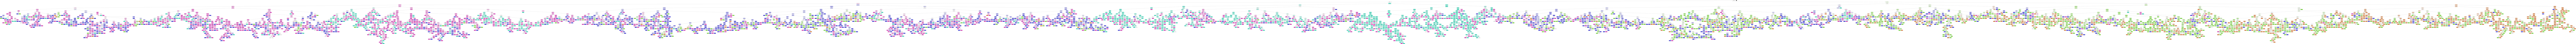

In [19]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())


Accuracy: 0.597763470010166


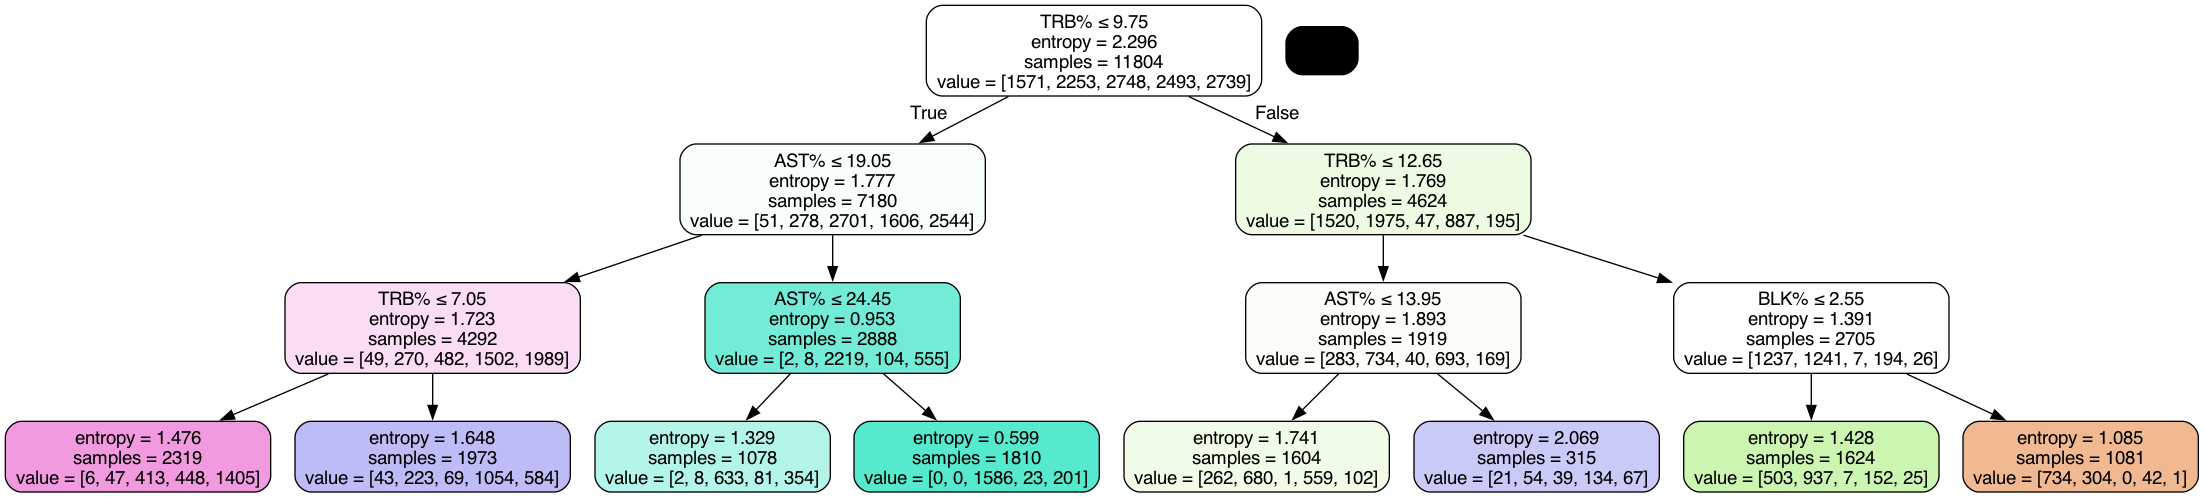

In [25]:
# criterion="entropy", max_depth=5
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = list(X_train.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree-min.png')
Image(graph.create_png())

In [21]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4039308708912233
